In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:


### 예측모델 구현 



In [142]:
DATA_DIR = '/Volumes/Data/Row_Data'
LOAD_FILE = 'advertising.csv'
URL = f'{DATA_DIR}/{LOAD_FILE}'

In [143]:
df_data = pd.read_csv(URL)
df_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

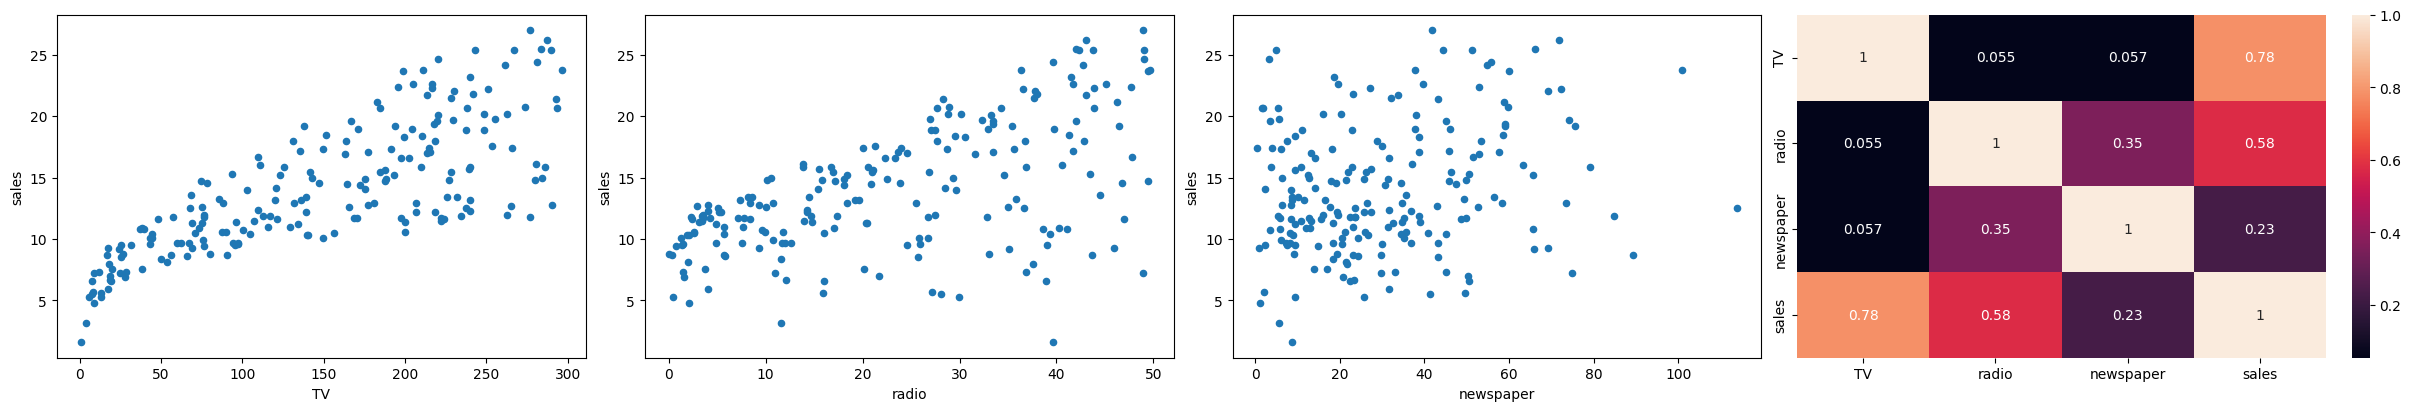

In [144]:

fig = plt.figure( figsize=(24,4), layout='constrained')
[ax1,ax2,ax3, ax4] = fig.subplots(1,4)

df_data.plot.scatter(x='TV', y='sales', ax= ax1)
df_data.plot.scatter(x='radio', y='sales', ax= ax2)
df_data.plot.scatter(x='newspaper', y='sales', ax= ax3)

sns.heatmap(df_data.corr(), annot=True, ax=ax4)



In [23]:
x = df_data[['TV', 'radio', 'newspaper']]
y = df_data['sales']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(f"x_train:{x_train.shape}, x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}, y_test:{y_test.shape}")

x_train:(150, 3), x_test:(50, 3)
y_train:(150,), y_test:(50,)


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
for i in range(3):
    print("w%d = %.3f" % (i+1, model.coef_[i]))

print("b = %.3f" % (model.intercept_))

w1 = 0.046
w2 = 0.195
w3 = 0.002
b = 2.497


In [33]:
predict = model.predict(x_test)
predict

array([22.03645345, 19.33770899, 15.21357412,  6.24328446, 17.03045629,
       14.42628021, 18.16396583, 14.39092079, 11.61180004,  8.12010379,
       11.81336786, 15.0864144 ,  8.41028251,  8.52147061, 21.52720439,
       23.57846328, 12.28063291, 16.31994412,  6.23655978, 21.76257092,
       11.29855848, 18.49413891,  9.44889992,  3.30729435, 18.50317938,
       16.36376185,  7.37647134, 19.60694727,  4.17220679, 15.43350075,
        9.24705394, 17.31503702, 15.45264402, 12.60055712, 10.45819838,
       16.26656498, 19.63435935, 10.29469854, 19.29387548, 18.57172413,
       12.01316679,  5.02508198, 15.69960361,  7.3628804 , 20.3417546 ,
       14.52106841, 13.13975785,  5.42336978, 10.70305246, 11.43401516])

In [42]:
y_test.head()

58     23.8
133    19.6
85     15.2
127     8.8
89     16.7
Name: sales, dtype: float64

In [38]:
model.score(x_test, y_test)

0.9070144724552736

In [41]:
print("광고에 따른 판매량 확인을 위해 정보를 입력해주세요.")
tv = float(input("TV:"))
radio = float(input("Radio:"))
newspaper = float(input("Newspaper:"))

sales_predict=model.predict( [[tv,radio,newspaper]] )

print("예상 판매량은 %f입니다." % sales_predict)

광고에 따른 판매량 확인을 위해 정보를 입력해주세요.


TV: 180.4
Radio: 12.2
Newspaper: 10.3


예상 판매량은 13.274091입니다.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/r5/124yntwj1n7_xfgvd8f6pzv40000gn/T/ipykernel_4845/3328976622.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("예상 판매량은 %f입니다." % sales_predict)


In [ ]:


### 분류모델 구현 



In [114]:
DATA_DIR = '/Volumes/Data/Row_Data'
LOAD_FILE = 'Iris.csv'
URL = f'{DATA_DIR}/{LOAD_FILE}'

In [124]:
df_data = pd.read_csv(URL)
df_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

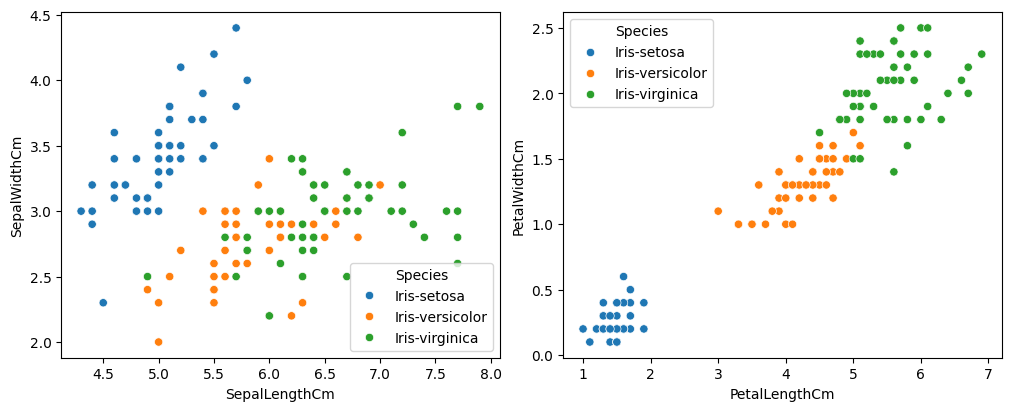

In [125]:

fig = plt.figure( figsize=(10,4), layout='constrained')
[ax1,ax2] = fig.subplots(1,2)

sns.scatterplot(data=df_data,  x='SepalLengthCm', y = 'SepalWidthCm', hue='Species', ax= ax1)
sns.scatterplot(data=df_data,  x='PetalLengthCm', y = 'PetalWidthCm', hue='Species', ax= ax2)


<Axes: xlabel='Species', ylabel='PetalWidthCm'>

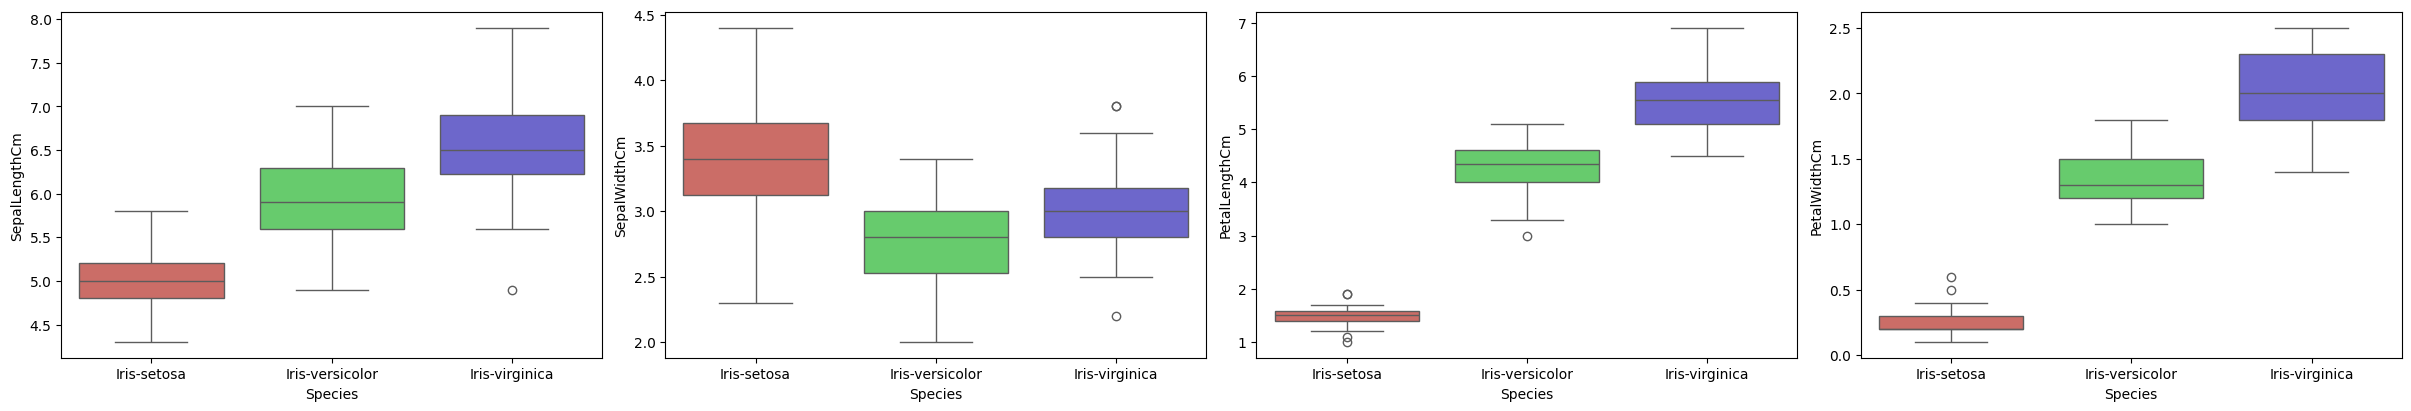

In [141]:

fig = plt.figure( figsize=(24,4), layout='constrained')
[ax1,ax2,ax3,ax4 ]= fig.subplots(1,4)

sns.boxplot(data=df_data, x="Species", y="SepalLengthCm", hue="Species", order=['Iris-setosa','Iris-versicolor','Iris-virginica'], palette=sns.color_palette('hls', 3), ax=ax1)
sns.boxplot(data=df_data, x="Species", y="SepalWidthCm", hue="Species", order=['Iris-setosa','Iris-versicolor','Iris-virginica'], palette=sns.color_palette('hls', 3), ax=ax2)
sns.boxplot(data=df_data, x="Species", y="PetalLengthCm", hue="Species", order=['Iris-setosa','Iris-versicolor','Iris-virginica'], palette=sns.color_palette('hls', 3), ax=ax3)
sns.boxplot(data=df_data, x="Species", y="PetalWidthCm", hue="Species", order=['Iris-setosa','Iris-versicolor','Iris-virginica'], palette=sns.color_palette('hls', 3), ax=ax4)


In [59]:
x = df_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_data['Species']

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(f"x_train:{x_train.shape}, x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}, y_test:{y_test.shape}")

x_train:(105, 4), x_test:(45, 4)
y_train:(105,), y_test:(45,)


In [82]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [78]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [89]:
predict = model.predict(x_test)
predict

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [90]:
model.score(x_test, y_test)

0.9333333333333333

<Axes: >

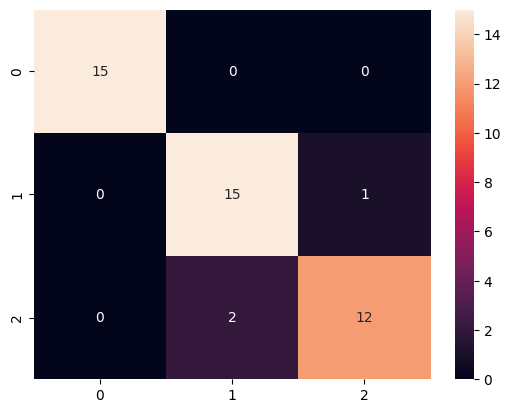

In [91]:
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(y_test, predict)

sns.heatmap(conf, annot=True)

In [92]:
print("붓꽃 품종 확인을 위해 정보를 입력해주세요.")

sLength= float(input("꽃받침 길이:"))
sWidth= float(input("꽃받침 너비:"))
pLength= float(input("꽃잎 길이:"))
pWidth= float(input("꽃잎 너비:"))

species_predict = model.predict([[sLength, sWidth, pLength, pWidth]])
print("붓꽃 품종은 %s입니다." % species_predict)

붓꽃 품종 확인을 위해 정보를 입력해주세요.


꽃받침 길이: 4.1
꽃받침 너비: 3.1
꽃잎 길이: 2.0
꽃잎 너비: 0.6


붓꽃 품종은 ['Iris-setosa']입니다.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:


### 군집모델 구현 



In [93]:
DATA_DIR = '/Volumes/Data/Row_Data'
LOAD_FILE = '택배.csv'
URL = f'{DATA_DIR}/{LOAD_FILE}'

In [94]:
df_data = pd.read_csv(URL)
df_data

,Num,Latitude,Longitude
0,1,37.336803,126.712836
1,2,37.501303,126.787808
2,3,37.522501,126.777363
3,4,37.511178,126.743209
4,5,37.508776,126.738469
...,...,...,...
366,367,37.299009,126.833047
367,368,37.524540,126.622279
368,369,37.491371,126.678090
369,370,37.527372,126.623457


<Axes: xlabel='Longitude', ylabel='Latitude'>

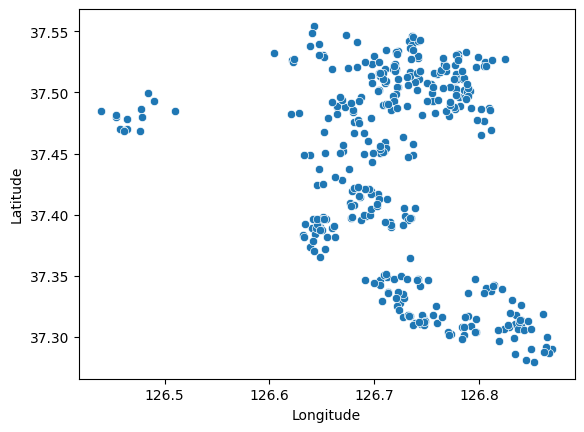

In [95]:
sns.scatterplot(data=df_data,  x='Longitude', y = 'Latitude')

In [97]:
area = df_data[['Longitude', 'Latitude']]

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for i in range(2, 9):
    model = KMeans(n_clusters = i)
    k_model = model.fit(area)
    cluster = k_model.labels_
    k = silhouette_score(area, cluster)
    print("k=%d Silhouette Score: %.3f" %(i,k))

k=2 Silhouette Score: 0.303
k=3 Silhouette Score: 0.484
k=4 Silhouette Score: 0.441
k=5 Silhouette Score: 0.486
k=6 Silhouette Score: 0.500
k=7 Silhouette Score: 0.452
k=8 Silhouette Score: 0.501


In [99]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 8)
cluster = model.fit_predict(area)
cluster

array([0, 5, 5, 7, 7, 7, 5, 7, 7, 7, 5, 6, 5, 6, 7, 1, 7, 6, 7, 6, 6, 5,
       5, 1, 5, 6, 7, 1, 0, 5, 7, 6, 7, 0, 0, 6, 5, 3, 6, 2, 2, 0, 5, 7,
       3, 7, 6, 0, 6, 0, 5, 3, 3, 0, 0, 0, 6, 7, 2, 6, 6, 3, 7, 6, 3, 5,
       1, 0, 0, 3, 0, 6, 3, 2, 5, 3, 6, 7, 3, 3, 0, 7, 5, 7, 3, 6, 2, 4,
       4, 3, 4, 5, 3, 5, 3, 5, 3, 5, 5, 6, 5, 2, 2, 3, 0, 4, 3, 5, 6, 5,
       7, 0, 0, 2, 3, 7, 1, 4, 6, 0, 6, 0, 5, 3, 7, 5, 7, 5, 0, 7, 4, 3,
       0, 6, 1, 7, 7, 0, 5, 6, 7, 0, 3, 6, 6, 5, 3, 7, 1, 3, 3, 0, 5, 6,
       5, 1, 5, 3, 2, 5, 3, 6, 0, 5, 0, 7, 5, 5, 6, 5, 3, 2, 4, 2, 5, 7,
       5, 2, 5, 6, 3, 2, 5, 6, 7, 1, 6, 2, 7, 5, 3, 3, 5, 7, 0, 2, 7, 5,
       5, 4, 5, 0, 7, 3, 2, 5, 6, 5, 3, 3, 0, 7, 4, 2, 3, 0, 0, 5, 2, 1,
       5, 0, 0, 5, 0, 4, 3, 4, 0, 2, 0, 6, 6, 7, 6, 6, 3, 3, 1, 6, 2, 0,
       7, 0, 5, 1, 2, 5, 5, 6, 6, 5, 1, 3, 7, 7, 5, 2, 5, 0, 2, 0, 6, 7,
       7, 1, 4, 6, 7, 1, 7, 0, 7, 0, 1, 7, 2, 5, 3, 5, 5, 7, 7, 7, 5, 6,
       7, 6, 2, 7, 6, 6, 3, 0, 0, 7, 3, 2, 7, 6, 6,

In [100]:

area['cluster'] = cluster
area


,Longitude,Latitude,cluster
0,126.712836,37.336803,0
1,126.787808,37.501303,5
2,126.777363,37.522501,5
3,126.743209,37.511178,7
4,126.738469,37.508776,7
...,...,...,...
366,126.833047,37.299009,3
367,126.622279,37.524540,1
368,126.678090,37.491371,1
369,126.623457,37.527372,1


<Axes: xlabel='Longitude', ylabel='Latitude'>

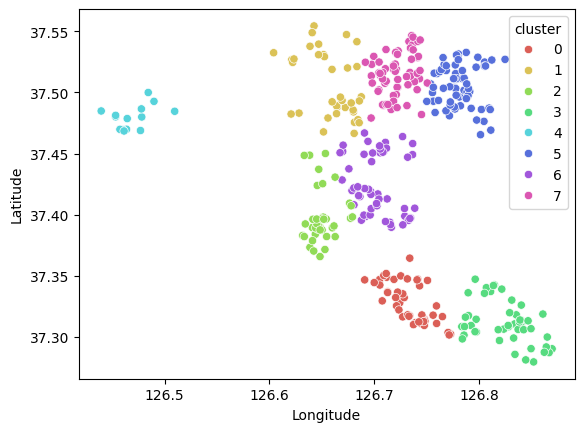

In [102]:
sns.scatterplot(data=area,  x='Longitude', y = 'Latitude',  hue='cluster' , palette=sns.color_palette('hls', 8))

In [113]:
import folium

map= folium.Map(location=[37.456460, 126.705195], zoom_start=12)

colors=['red', 'blue', 'green', 'black', 'yellow', 'gray', 'purple', 'orange']

for i in range(8):
    latitudeT = area[cluster==i]['Latitude']
    longitudeT = area[cluster==i]['Longitude']

    for latitude, longitude in zip(latitudeT, longitudeT):
        folium.Marker(location=[latitude, longitude], icon=folium.Icon(color=colors[i])).add_to(map)

map

/var/folders/r5/124yntwj1n7_xfgvd8f6pzv40000gn/T/ipykernel_4845/3853959403.py:12: UserWarning: color argument of Icon should be one of: {'green', 'purple', 'black', 'darkgreen', 'beige', 'blue', 'red', 'cadetblue', 'orange', 'white', 'darkred', 'pink', 'darkblue', 'lightred', 'darkpurple', 'lightgreen', 'lightblue', 'lightgray', 'gray'}.
  folium.Marker(location=[latitude, longitude], icon=folium.Icon(color=colors[i])).add_to(map)
